## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [38]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

In [39]:
plt.rcParams['figure.figsize'] = (16, 9)
sns.set_theme(style='white',palette='Set2',rc= {"axes.spines.right": False, "axes.spines.top": False})

In [40]:
df = pd.read_csv('creditcard.csv')
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

## Exploratory data analysis

### 1. Missing value treatment

In [41]:
df.isna().sum().sum()

0

**All variables are free of any mising value** so we can move to the next phase of treatment - DataType

### 2. Fixing Data types of columns

In [42]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Variables V1-V28 are not interpretable. Rather they are Principal Components of the original features so they should be numeric only.
Also, `Amount` is a numeric field. `Time` for this dataset specifies the number of seconds past the first transaction which should also be numeric.

So all these data types are correct.

Hence we can move to the next phase- Removal of unnecessary features

### 3. Removal of unnecessary features
The features V1-V28 are masked by PCA hence we cannot determine their importance by merely looking at them. Hence their importance shall be further tested by analysis and by the ML algorithm.

### 4. Derived Features
We can derive a new feature which would divide the transaction as a upper tier, lower tier or mid tier on the basis of transaction value.

In [43]:
df.Amount.describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

Let's compute the quantiles for converting the amount field into categorical variable

In [44]:
# Quantiles are 20%, 40%, 60%, 80%
q4 = np.quantile(df.Amount, 0.8)
q3 = np.quantile(df.Amount, 0.6)
q2 = np.quantile(df.Amount, 0.4)
q1 = np.quantile(df.Amount, 0.2)

In [45]:
def classify_type(x):
    '''
    Function to use the above computed quantiles to classify the input amount value
    '''
    if x >= q4:
        return 'Very High'
    elif x >= q3 and x < q4:
        return 'High'
    elif x >= q2 and x < q3:
        return 'Mid'
    elif x >= q1 and x < q2:
        return 'Low'
    else:
        return 'Very Low'

In [46]:
df['Type'] = df.Amount.apply(classify_type)

In [47]:
PC_df = df.drop(columns=['Amount','Time','Class', 'Type'])

## Univariate Analysis

### 1. 'Class' column

Here we will observe the distribution of our classes

In [48]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print(f"Normal Transactions include : {normal_share}")
print(f"Fraud Transactions: {fraud_share}")

Normal Transactions include : 99.82725143693798
Fraud Transactions: 0.1727485630620034


[Text(0.5, 1.0, 'Percentage of Fraud vs Normal transactions')]

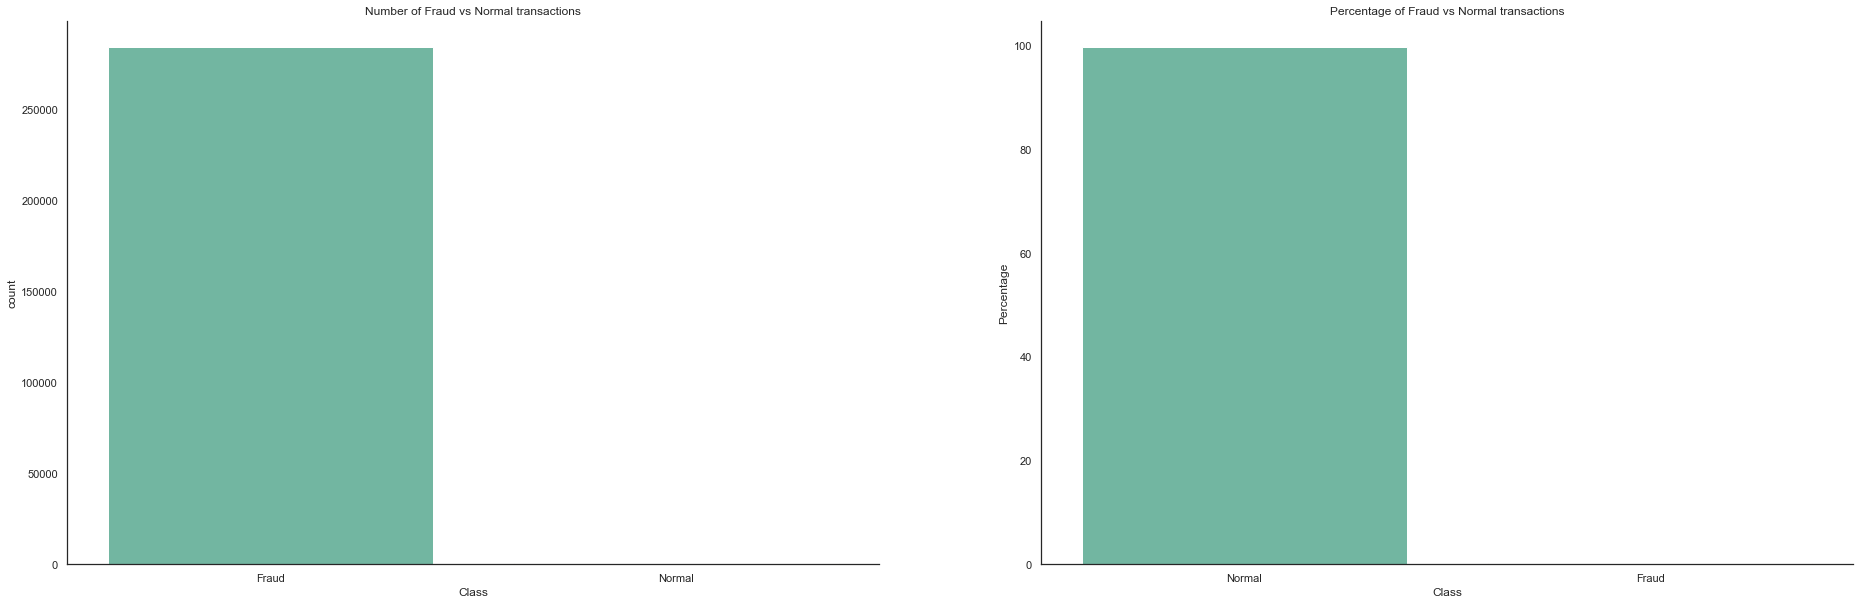

In [49]:
# Create a bar plot for the number of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(32, 10))
plt.subplot(1, 2, 1)
ax = sns.countplot(data=df, x='Class');
ax.set_xticklabels(labels=['Fraud','Normal'])
ax.set(title='Number of Fraud vs Normal transactions')

# Create a bar plot for the percentage of fraudulent vs non-fraudulent transcations
plt.subplot(1, 2, 2)
temp = pd.DataFrame({'Class': [ 'Normal','Fraud'], 'Percentage': [normal_share,fraud_share]})
ax = sns.barplot(data=temp, x='Class', y='Percentage');
ax.set(title='Percentage of Fraud vs Normal transactions')


### 2. Time distribution

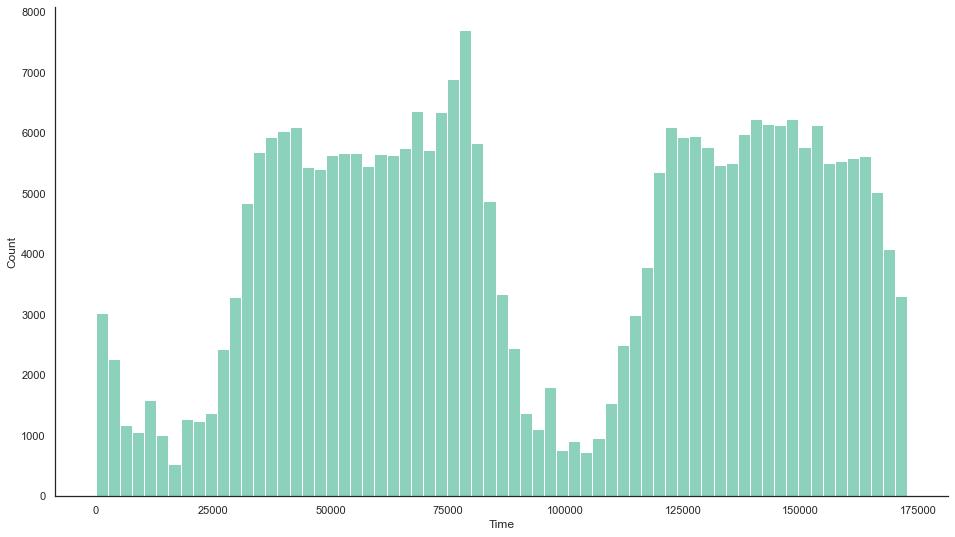

In [50]:
# Plot a histogram for the distribution of transactions over the period of two days
sns.histplot(data=df, x='Time');

**Observations:**
The transactions available in the dataset were recorded over time frame of 2 days. We can clearly see a bimodal distribution here indicating the pattern of transaction is repeated every day.
Every day there will be a surge in the transaction at certain time (indicated by the two peaks of the distribution, one for each day).

The transactions maintain their volume for the whole day only to come down to around 1000 transactions at certain time. 
We cannot know for sure if this time is day or night because the data does not specify when was the logging started but certainly there is a clear pattern in transaction volume

### 3. Amount

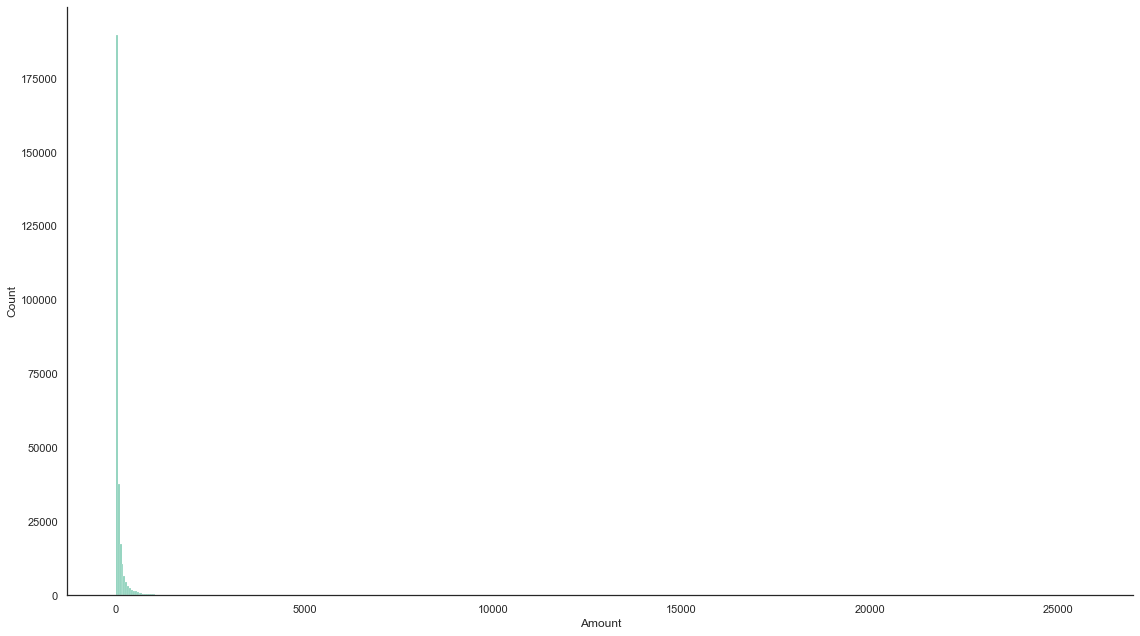

In [51]:
# Plot a histogram to check the distribution of Amount of transactions
sns.displot(data=df, x='Amount', kind='hist', binwidth=50, aspect=16/9, height=9, palette='Set2');

**Observations**
Most of the transactions that happened over the course of two days were of low value. The transactions above the value of 1000 are only a handful.

Let's check the boxplot of the transaction amount

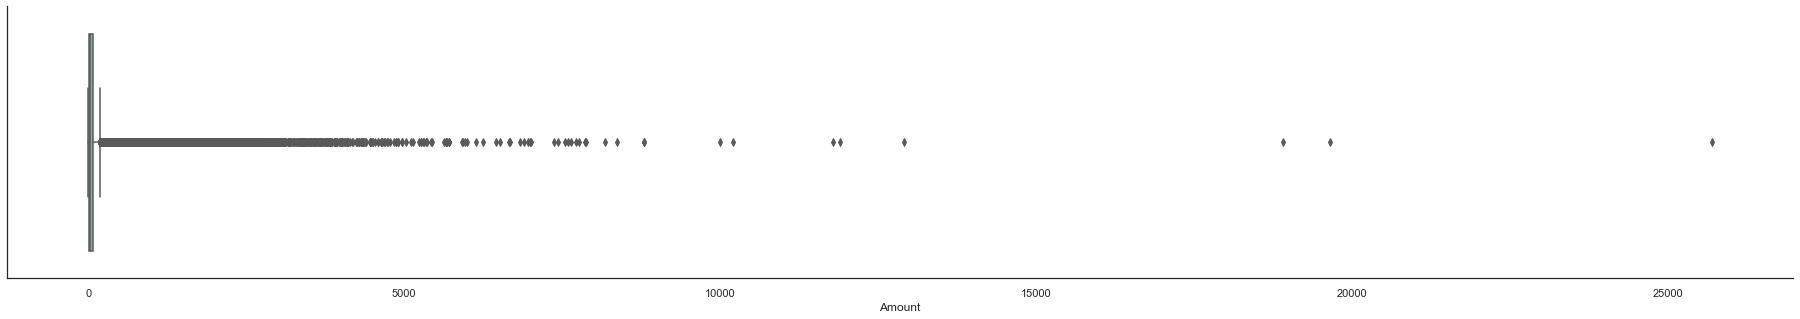

In [52]:
plt.figure(figsize=(32,5))
# plot the boxplot of Amount variable
sns.boxplot(data=df, x='Amount');

Clearly there are a lot of transactions which are above 1000 but their proportion relative to the rest of the transactions is VERY less. This is evident from the size of the box.

There are outliers in the dataset due to which the distribution is getting affected. We shall treat the outliers first in order to get a better picture of the dataset.

For treatment we will use the removal technique since just for better visualization we will be temporaily creating a new separate dataframe without outliers.

In [53]:
# computing the 95th percentile of the variable Amount
q95 = np.quantile(df.Amount, 0.95)
# Removing the outliers
amount_no_outliers = df[df.Amount <= q95].Amount

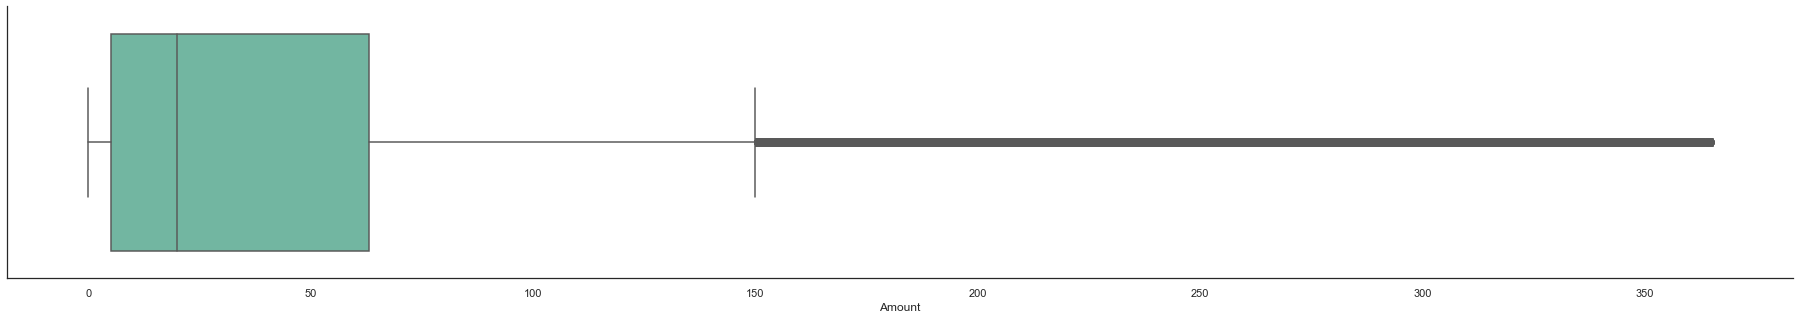

In [54]:
plt.figure(figsize=(32,5))
sns.boxplot(x=amount_no_outliers);

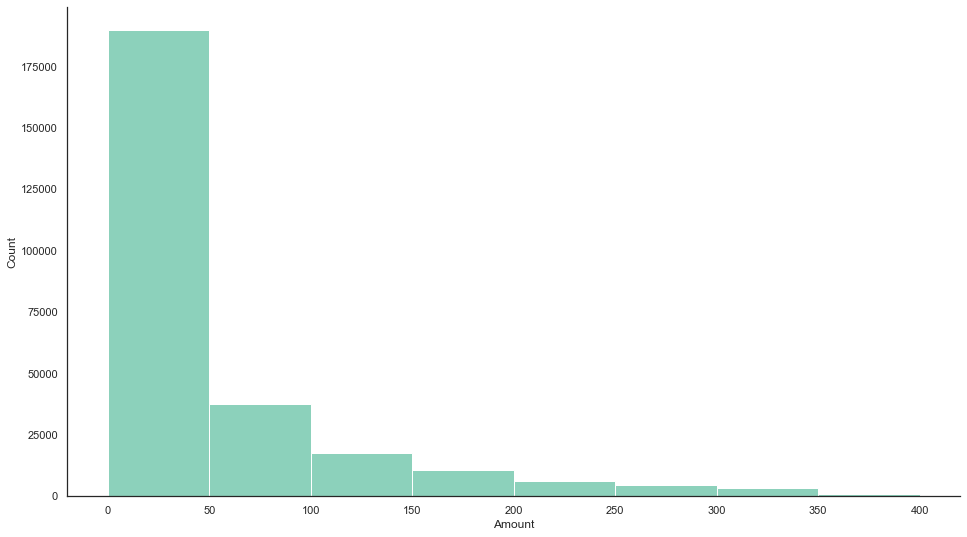

In [55]:
# create a hsitogram to show the distribution of transaction Amount without outliers
sns.histplot(amount_no_outliers,binwidth=50);

Now we will analyse the Fraudulent Transactions' Amount since most of the transactions are concentrated in the low value range. Let's check if the fraudulent transactions are high valued of low valued.

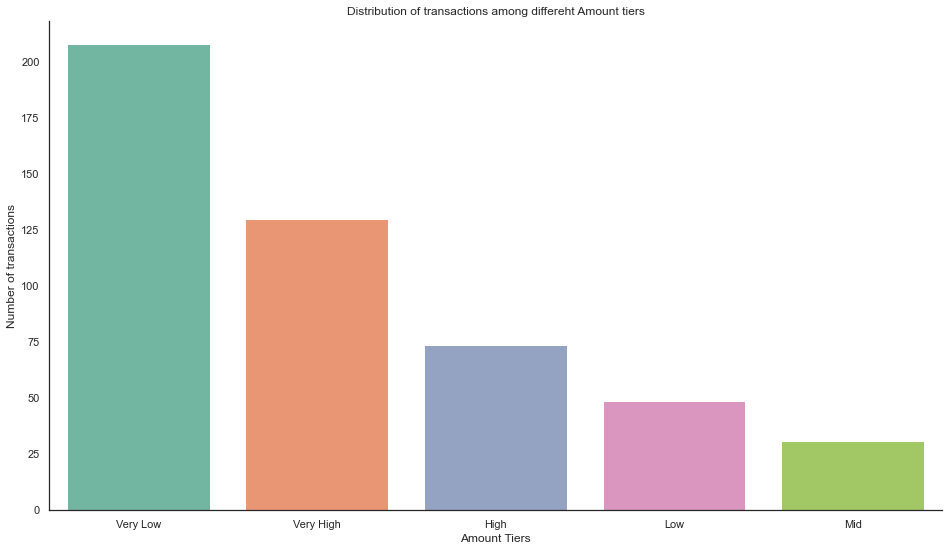

In [56]:
# Filter out fraud transactions
fraud_trans =  df[df.Class == 1]
# Check the number of transactions in each Amount category low, mid, high, etc.
amt_type_dist = fraud_trans.Type.value_counts()
# Create a barplot with above information
ax = sns.barplot(x=amt_type_dist.index, y=amt_type_dist.values);
ax.set(title='Distribution of transactions among differeht Amount tiers', xlabel='Amount Tiers', ylabel='Number of transactions');

**Observations**

The number of fraudulent transactions is the maximum in the Very low tier. This might be the reason they are getting away undetected.

In [57]:
# Compute the percentage of transactions in Very Low Amount tier
df[(df.Class == 1) & (df.Type == 'Very Low')]['Amount'].sum() / df[df.Class == 1]['Amount'].sum() * 100

0.317156890545282

**31.7% of the total Fraud transactions occured in Very Low amount over the span of two days**

### 4. Distribution of PCs(Variable 1 - Variable 28)

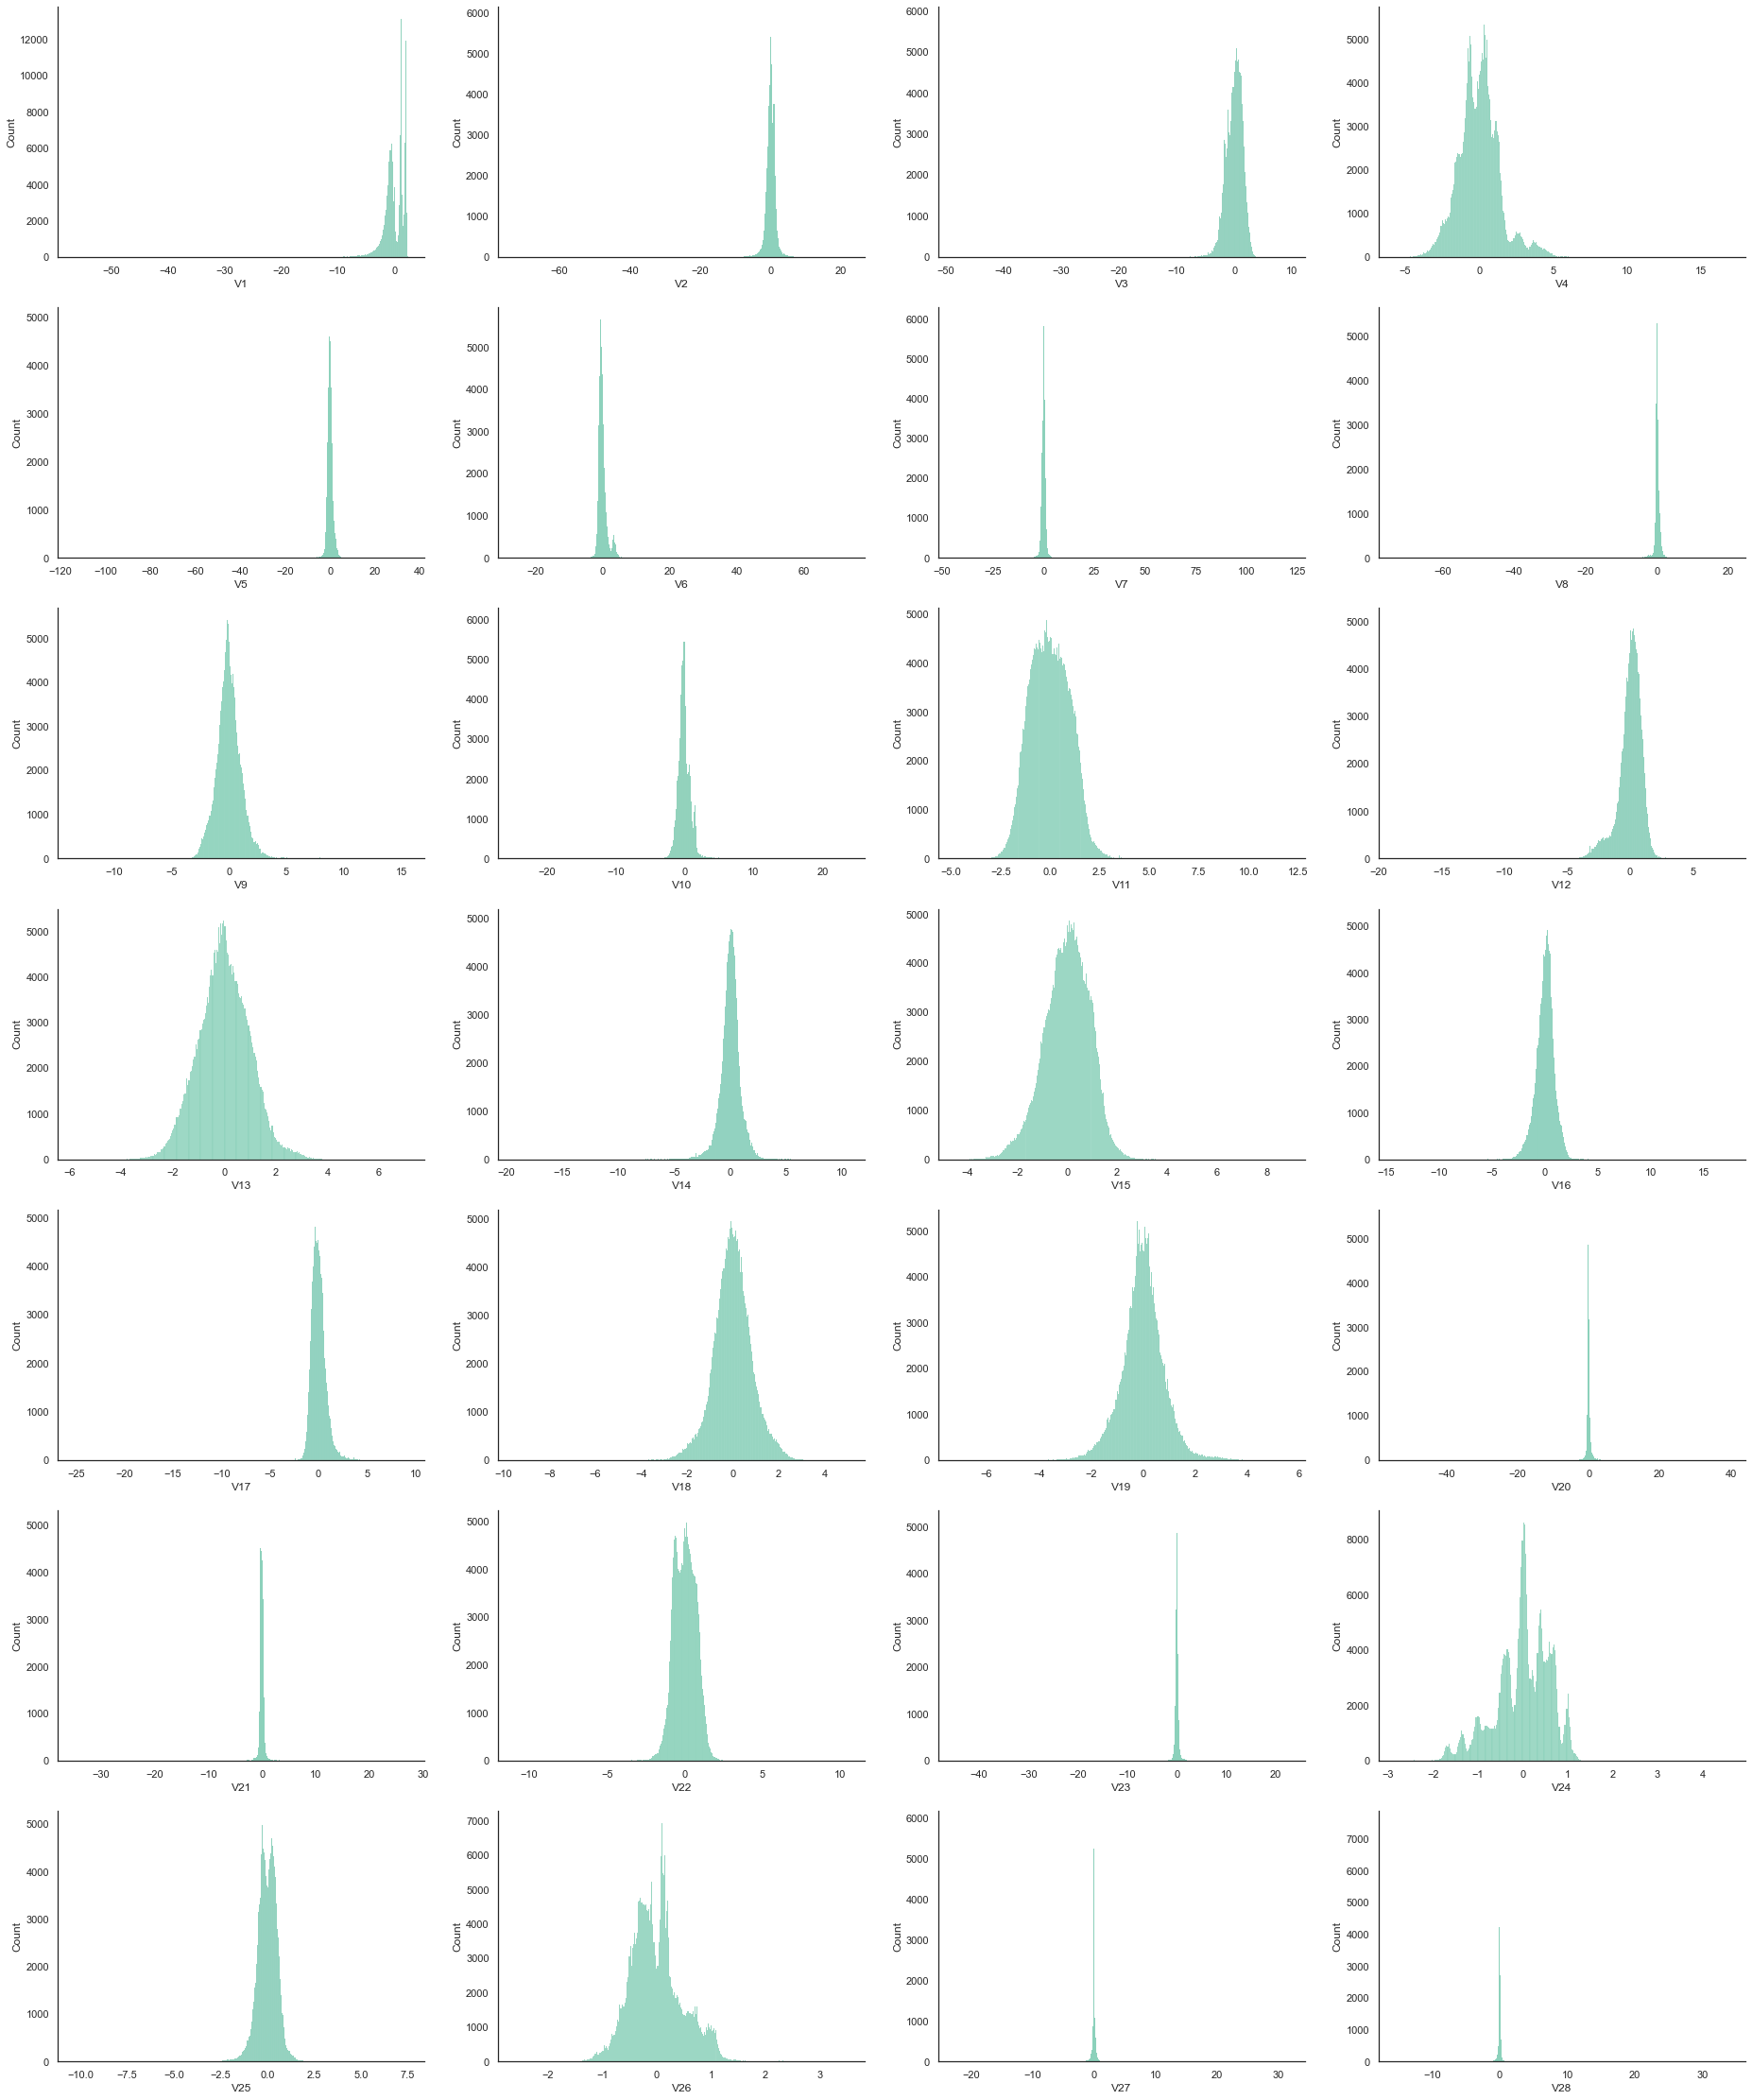

In [58]:
# Set figure size
fig = plt.figure(figsize=(32, 40))
# For each Principal Component
for idx, col in enumerate(PC_df.columns):
    # create a subplot
    plt.subplot(7, 4, idx+1)
    # plot a histogram for the variable
    sns.histplot(PC_df[col]);

The variables V1-V28 are all centered at 0 and have a approximately normal distribution. This is because PCA generates new components that are linear combination of the existing components.

## Bivariate Analysis

### 1. Relationship between Variables V1-V28 and Class

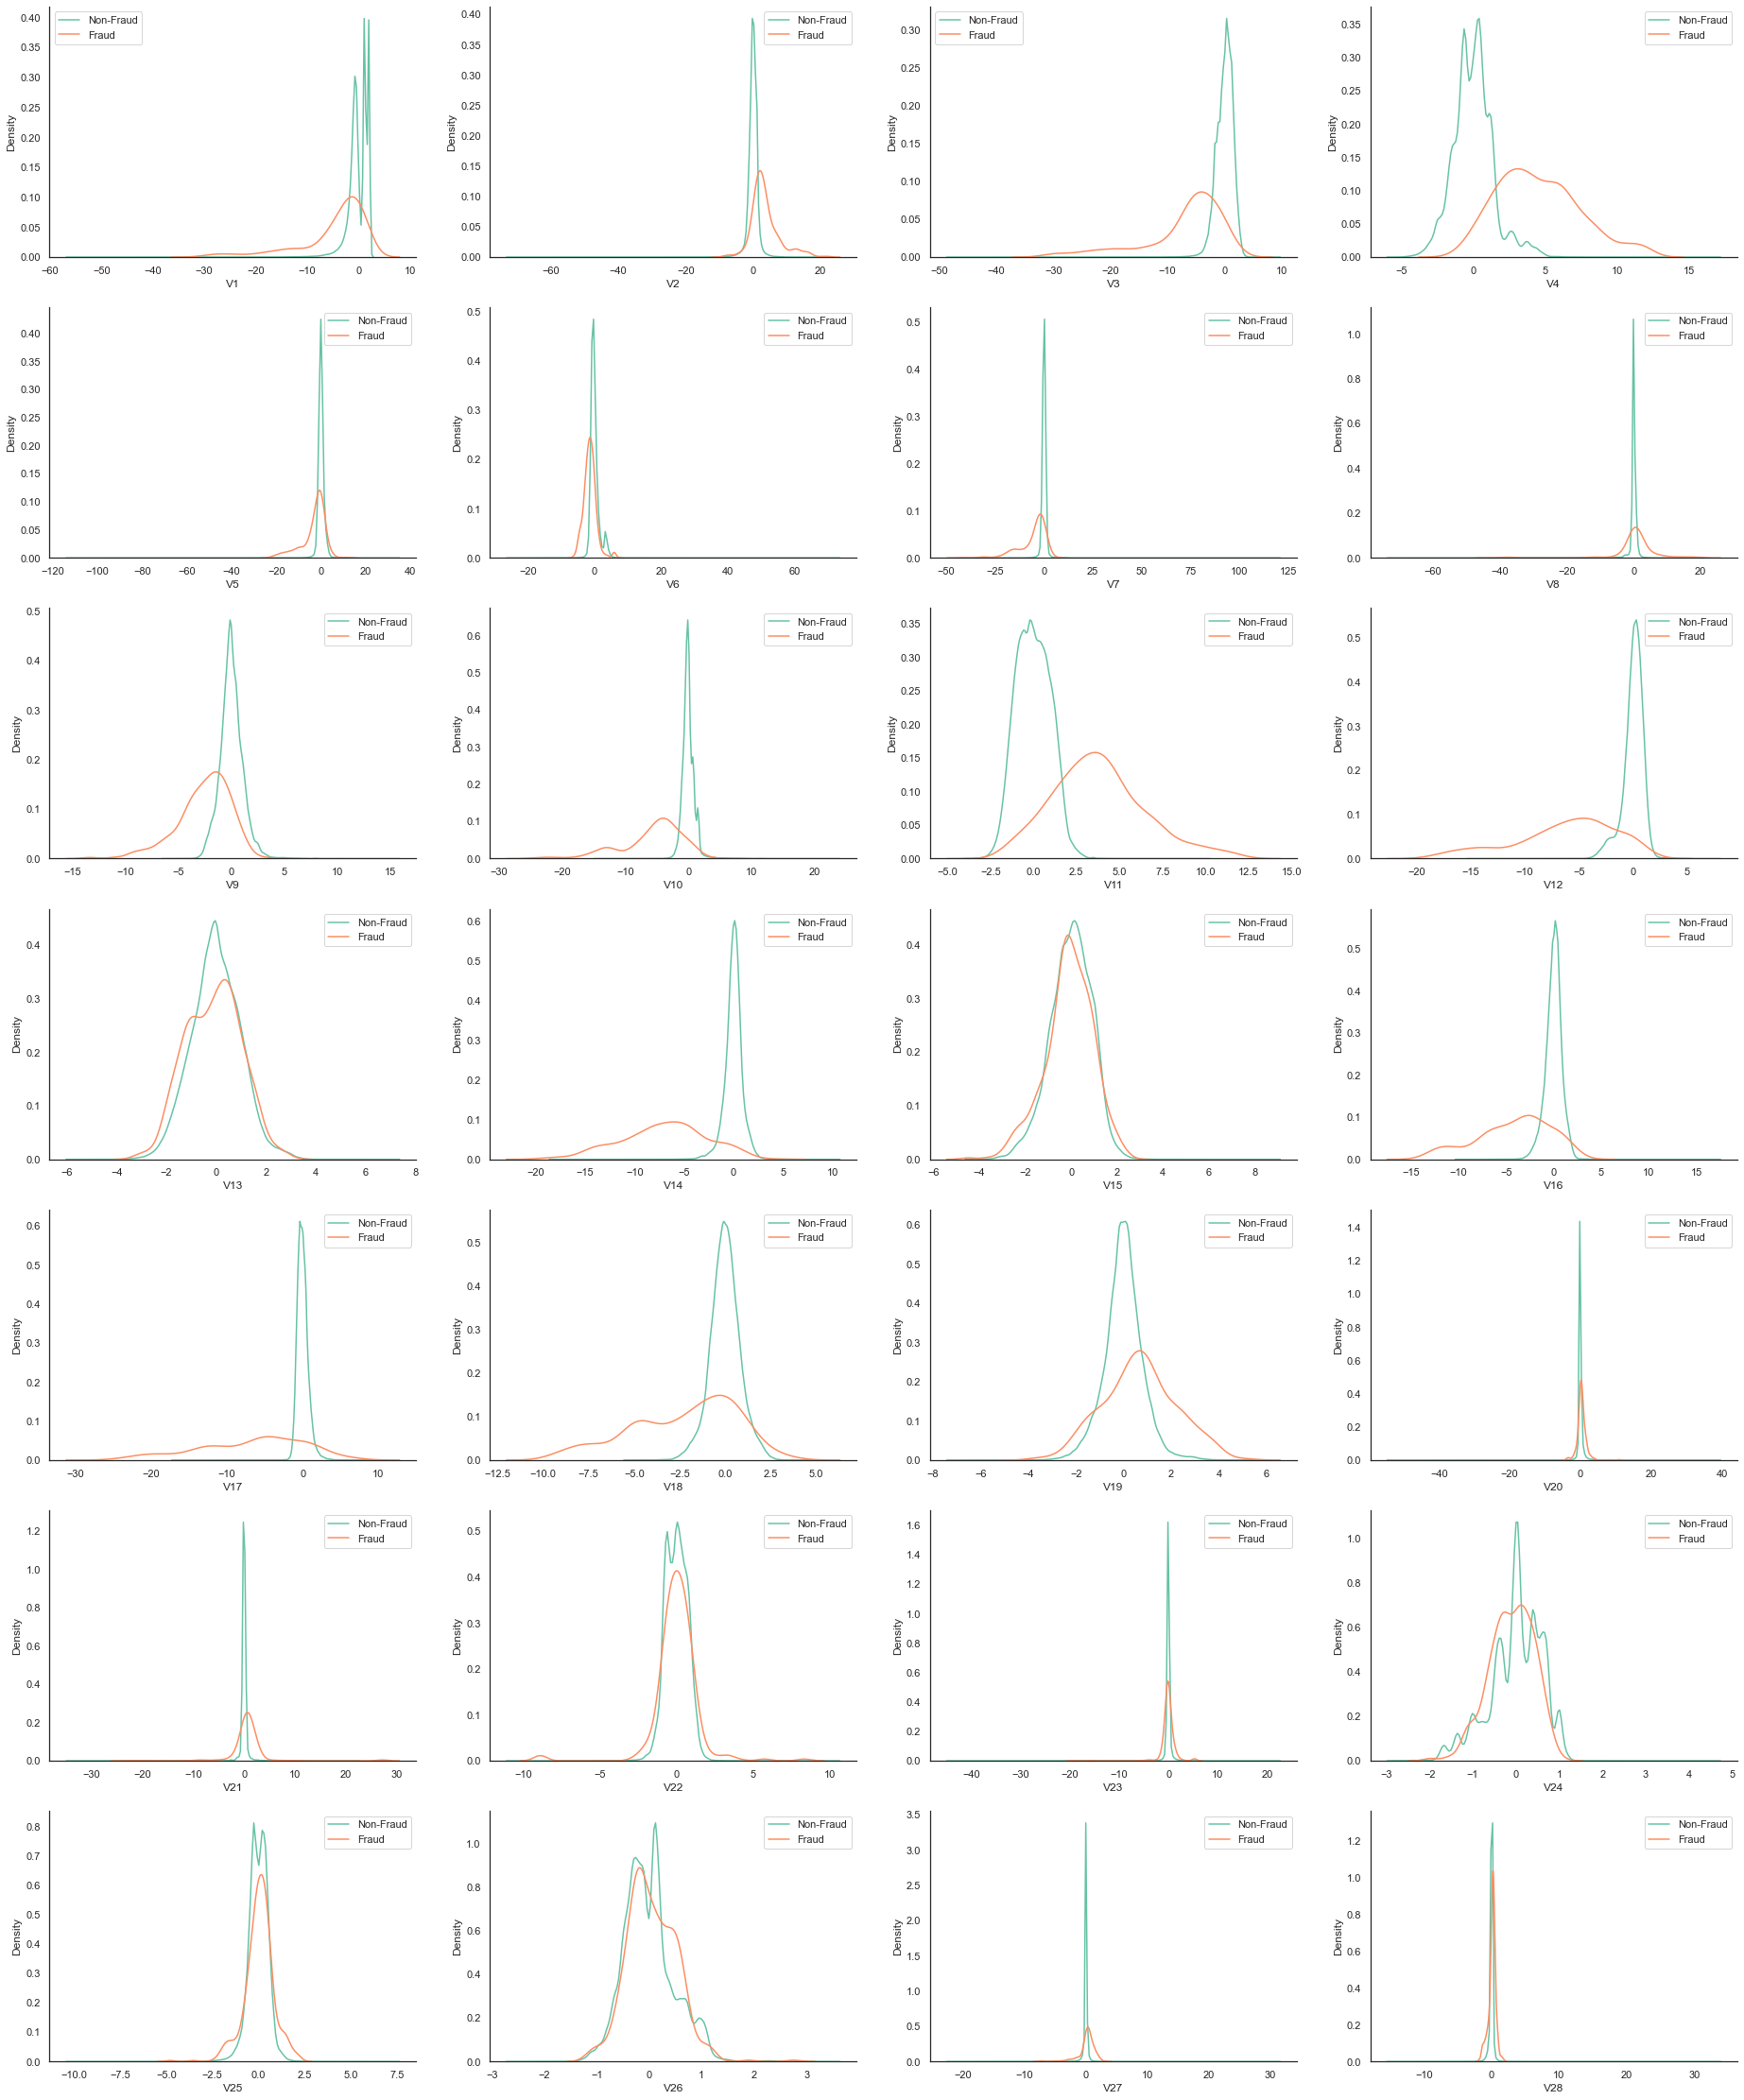

In [59]:
# Set figure size
plt.figure(figsize=(32, 40))
# For each Principal Component
for idx, col in enumerate(PC_df.columns):
    # Create a subplot
    ax = plt.subplot(7, 4, idx+1)
    # Draw a KDE plot for Non-Fraudelent transactions
    sns.kdeplot(data=df[df.Class==0], x=col, ax=ax, label='Non-Fraud');
    # Draw a KDE plot for Fraudelent transactions
    sns.kdeplot(data=df[df.Class==1], x=col, ax=ax, label='Fraud');
    # Add legend to subplot
    plt.legend()

The relationship between the Class and Variables V1-V28 is not very evident in a collective manner. However, there does seem to be some common features in some variables. 
- V10, V12, V16, V17, V18 all are having a much wider spread for Fraud Transactions than their Normal counterparts.
- V25, V26, V28 all are having same distribution for both Fraud and Non-Fraud transactions. Hence these variables are not expected to be differentiator between the two.

But nothing more conclusive can be said about the variables. 
We shall now proceed to analyze correlations between the pair of variables V1-V28

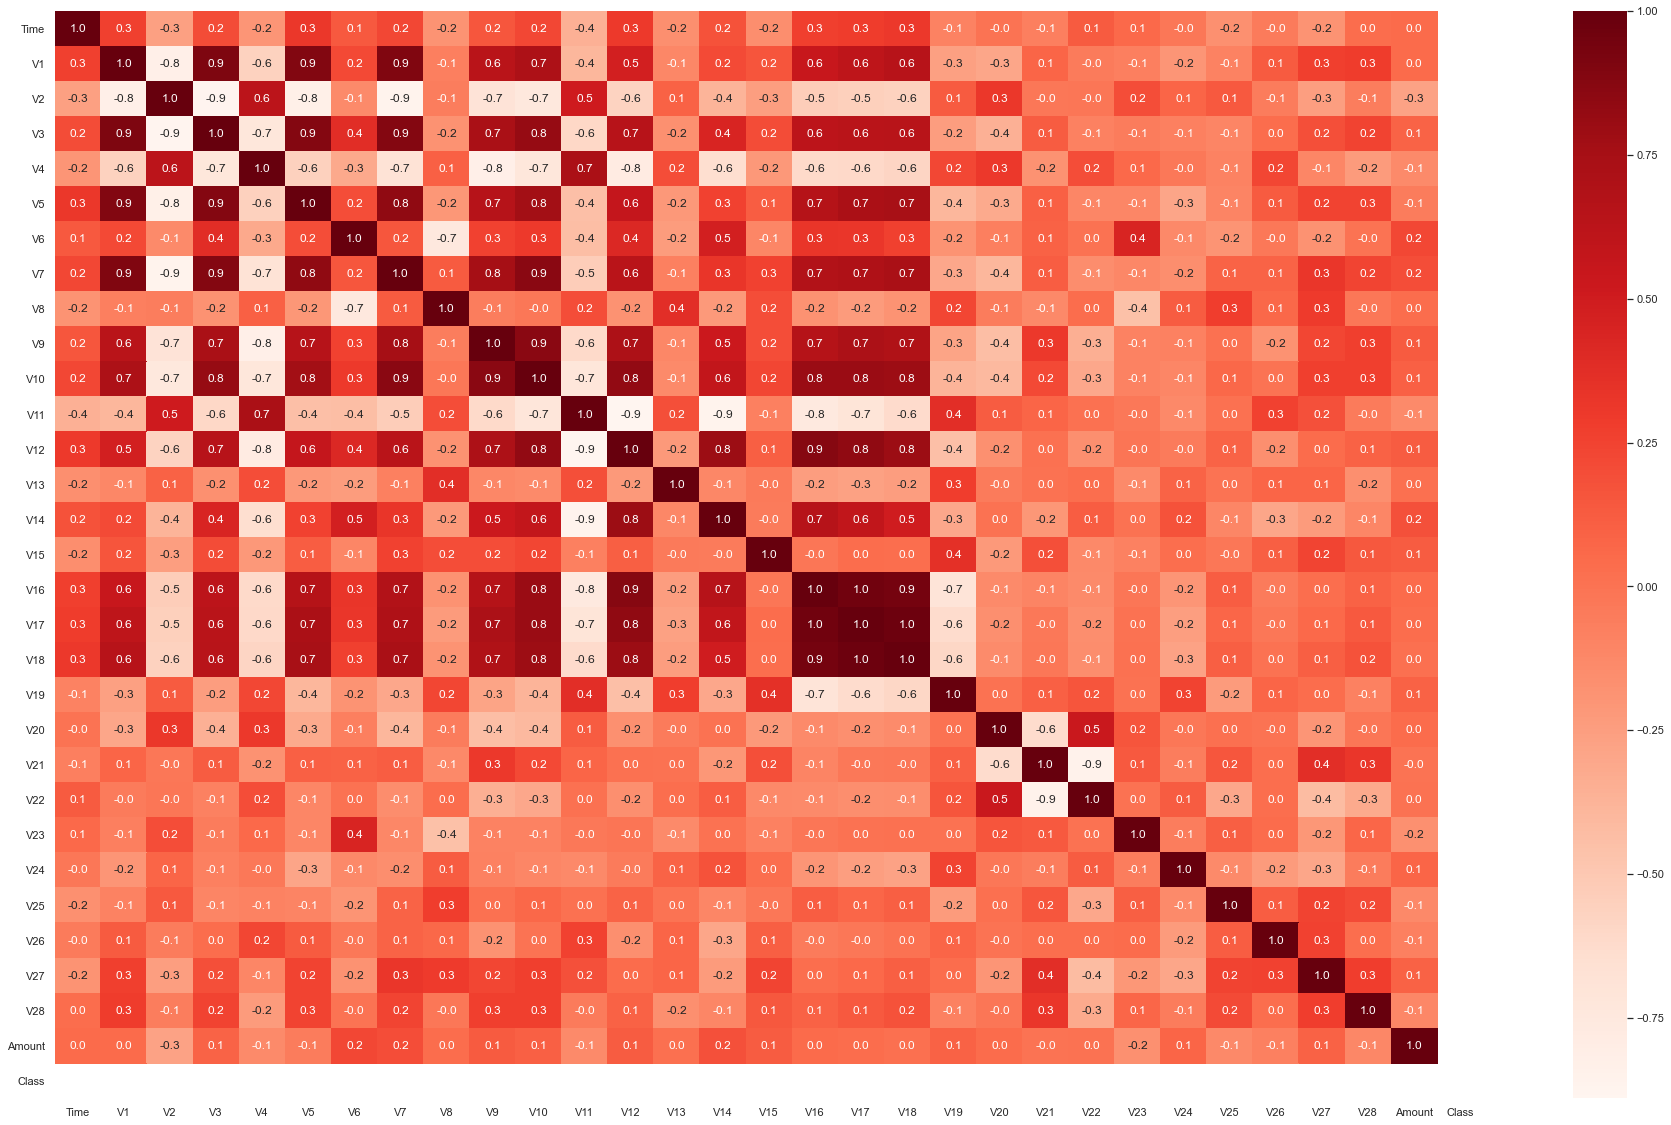

In [60]:
# Create a list of V1-V28 variables with Class variable
cols = list(PC_df.columns) + ['Class']
# Set figure size
plt.figure(figsize=(32, 20));
# Create a heatmap to show correlation between each pair of variables for Fraudulent transactions
sns.heatmap(fraud_trans.corr(), cmap='Reds', annot=True, fmt='.1f');

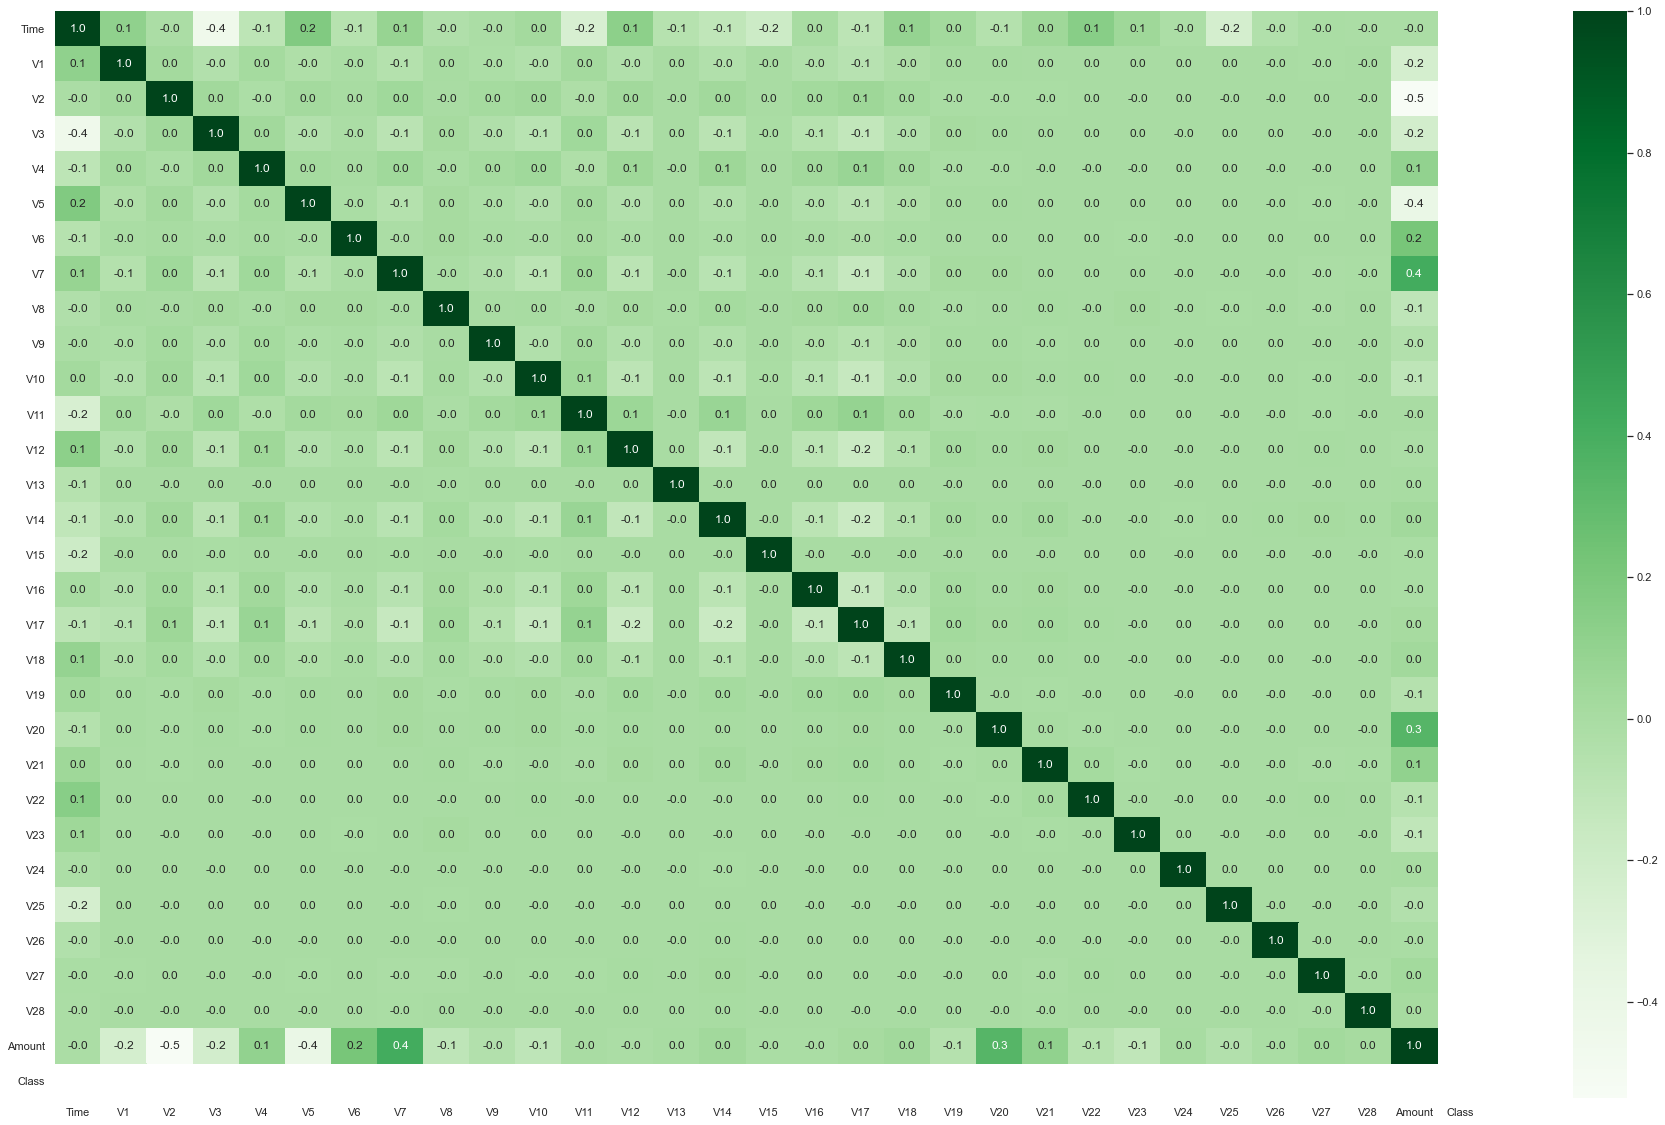

In [61]:
# Set figure size
plt.figure(figsize=(32, 20))
# Filter out Non-Fraudulent transactions
non_fraud_df = df[df.Class == 0]
# Create a heatmap to show correlation between each pair of variables for Non-Fraudulent transactions
sns.heatmap(non_fraud_df.corr(), cmap='Greens', annot=True, fmt='.1f');

**Observations**
- In case of Fraud transactions, there is high correlation between few of the variables V1-V28. However, the same cannot be said about the non-fraudulent transactions
- V10, V12, 16, V17, V18 are having high positive correlation with each other for Fraud Transactions
- V1, V3, V5, V7 are having high positive correlation with each other for Fraud Transactions
- V21 and V22 are highly negatively correlated with each other
- V11 is highly negatively correlated with V12 and V4
- V2 is highly negatively correlated with V1, V3, V5, V7

### 2. Relationship between Time and Class variable

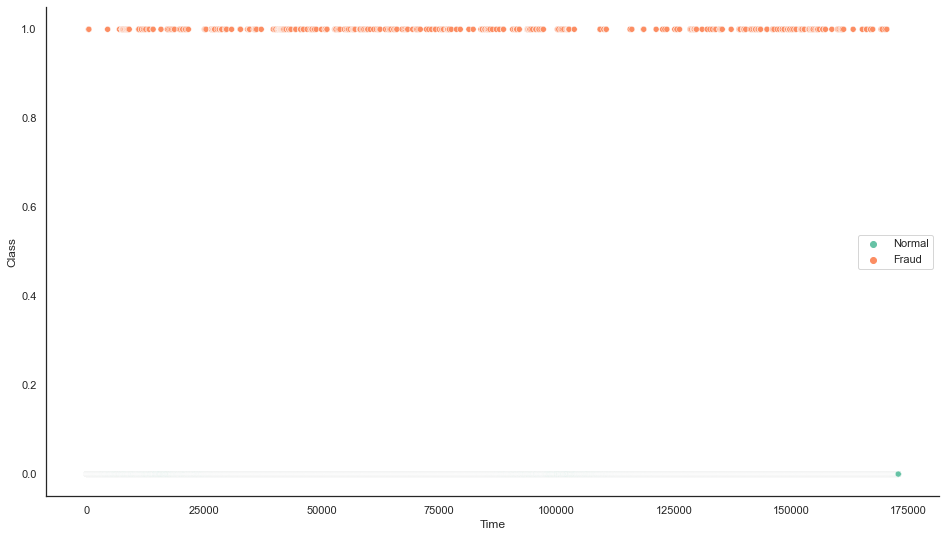

In [62]:
# Create a scatter plot to observe the distribution of classes with time
ax = sns.scatterplot(data=df, x='Time', y='Class', hue='Class');
# Customizing the legend labels
handles, labels = ax.get_legend_handles_labels();
ax.legend(handles, ['Normal','Fraud']);

### 3. Relationship between Class and Amount variable

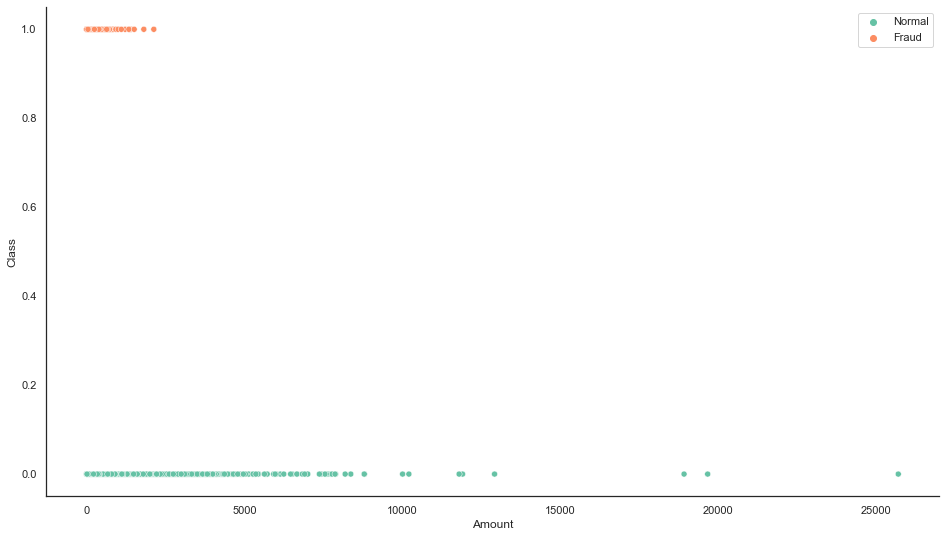

In [63]:
# Create a scatter plot to observe the distribution of classes with Amount
ax = sns.scatterplot(data=df, x='Amount', y='Class', hue='Class');
# change legend labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Normal','Fraud']);

**Observations**

Notice that the Fraudulent transactions are concentrated in a very small area in the left end of the Amount spectrum. This is in coherence with our previous observation that most Fraud transactions occur in the Very Low Amount tier.<br/>
Also, in this plot we can see the outliers(above amount of 10000) lied in legitimate transactions.

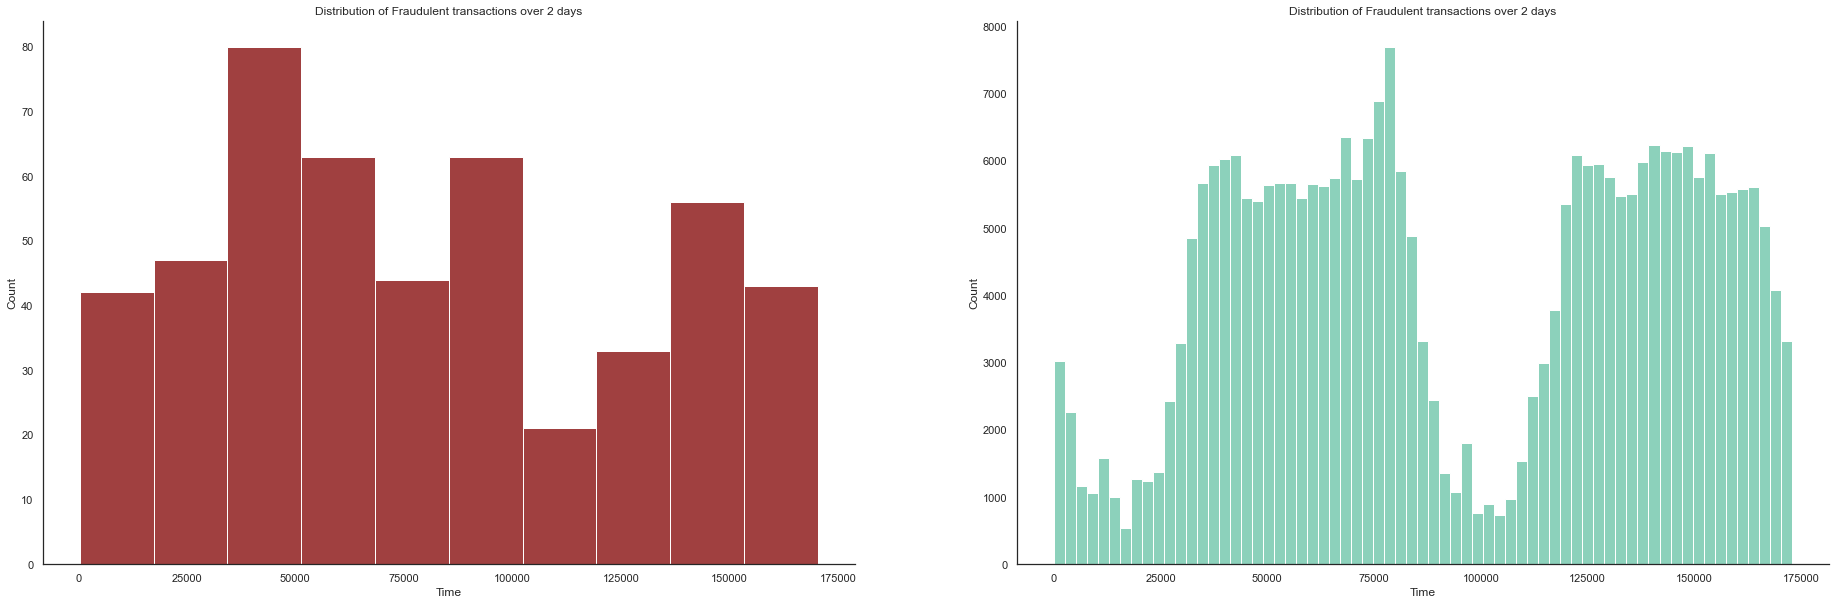

In [64]:
# Change figure size
plt.figure(figsize=(32, 10))
# Add new subplot
plt.subplot(1, 2, 1)
# Create a distribution of Fraud transactions over Time
ax = sns.histplot(data=df[df.Class==1], x='Time', color='maroon');
# Add title to plot
ax.set(title='Distribution of Fraudulent transactions over 2 days');
# Add new subplot
plt.subplot(1, 2, 2)
# Create a distribution of Fraud transactions over Time
ax = sns.histplot(data=df[df.Class==0], x='Time');
# Add title to plot
ax.set(title='Distribution of Fraudulent transactions over 2 days');

## Data Preparation
### Drop unnecessary columns
On basis of multicollinearity, we shall drop V16, V17, V18, V19 since V12 can suffice their purpose
- V3, V5, V7 since V1 will suffice their purpose
- V11 and V14 since V12 can suffice their purpose

In [65]:
modified_df = df.drop(columns=['V16','V17','V18','V19', 'V3', 'V5','V7','V11','V14', 'Type', 'Time'])
modified_df.head()

V1        V2        V4        V6        V8        V9       V10  \
0 -1.359807 -0.072781  1.378155  0.462388  0.098698  0.363787  0.090794   
1  1.191857  0.266151  0.448154 -0.082361  0.085102 -0.255425 -0.166974   
2 -1.358354 -1.340163  0.379780  1.800499  0.247676 -1.514654  0.207643   
3 -0.966272 -0.185226 -0.863291  1.247203  0.377436 -1.387024 -0.054952   
4 -1.158233  0.877737  0.403034  0.095921 -0.270533  0.817739  0.753074   

        V12       V13       V15  ...       V21       V22       V23       V24  \
0 -0.617801 -0.991390  1.468177  ... -0.018307  0.277838 -0.110474  0.066928   
1  1.065235  0.489095  0.635558  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.066084  0.717293  2.345865  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.178228  0.507757 -0.631418  ... -0.108300  0.005274 -0.190321 -1.175575   
4  0.538196  1.345852  0.175121  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1  0.167170  0.125895 -0.008983  0.014724    2.69      0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3  0.647376 -0.221929  0.062723  0.061458  123.50      0  
4 -0.206010  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 21 columns]

### Splitting the data into train & test data

In [66]:
from sklearn.model_selection import train_test_split

y = modified_df.pop('Class')
X = modified_df

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.7)

*Since there is skewness present in the distribution, we shall use: <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian*

In [67]:
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer(copy=False)

X_train = transformer.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = X.columns)

In [68]:
X_test = transformer.transform(X_test)
X_test = pd.DataFrame(X_test, columns=X.columns)

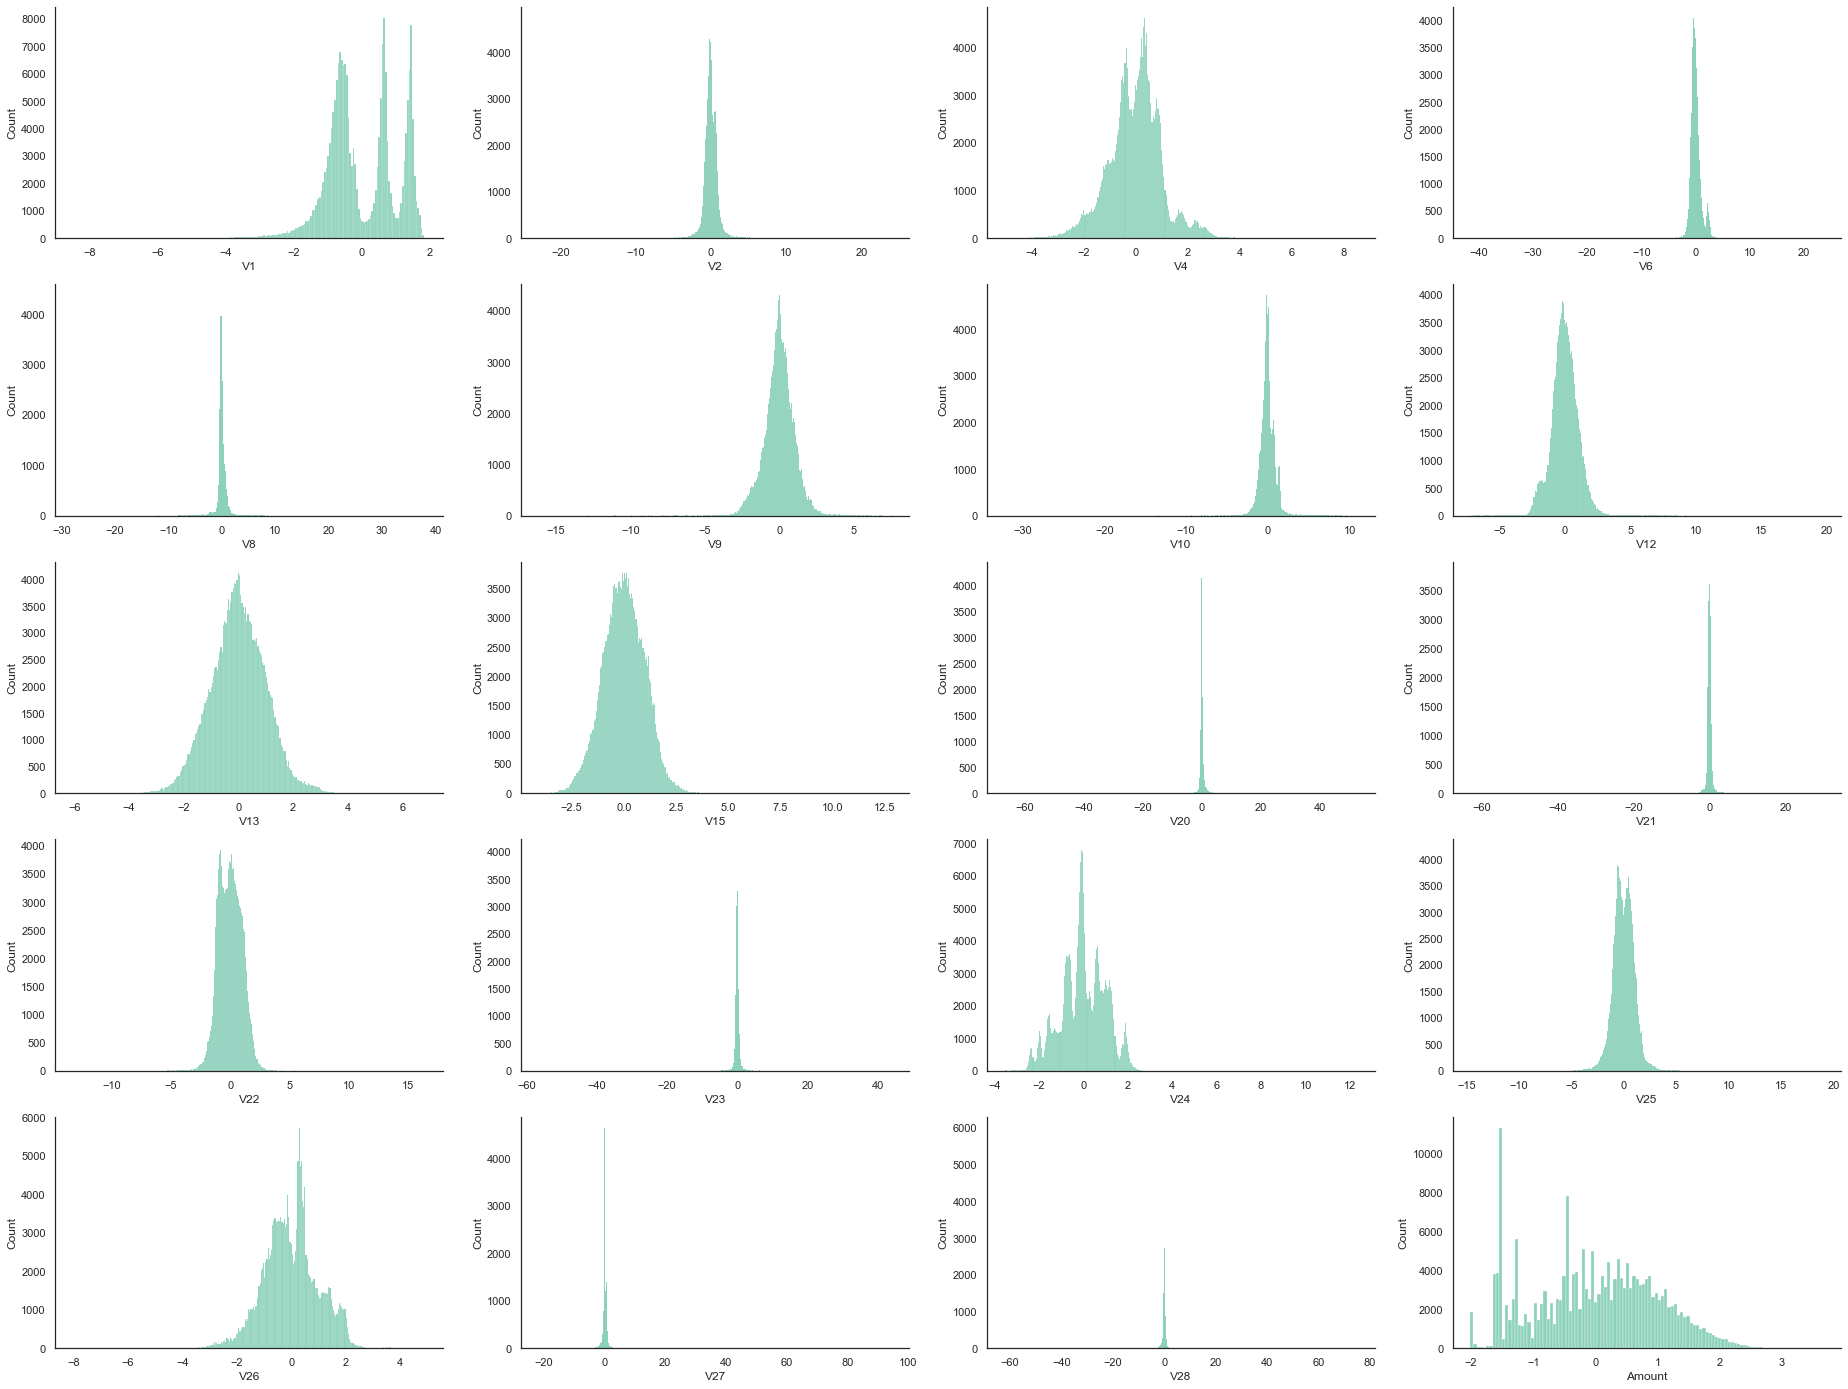

In [69]:
# plot the histogram of a variable from the dataset again to see the result 
plt.figure(figsize=(32, 40))
for idx, col in enumerate(X_train.columns):
    plt.subplot(8, 4, idx+1)
    sns.histplot(data=X_train, x=col);

## Model Building with Imbalanced classes

We will first build different models on the imbalanced dataset and see the result.

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [71]:
from sklearn.metrics import confusion_matrix, roc_auc_score
def metrics(y_true, y_pred, y_pred_prob):
    cm = confusion_matrix(y_true, y_pred)
    TN = cm[0,0]
    TP = cm[1,1]
    FP = cm[0,1]
    FN = cm[1,0]
    # precision means out of all the predicted positives, how many are correctly classified as positive
    precision = TP/(TP+FP)
    # recall means out of all the actual positives, how many are correctly classified as positive
    recall = TP/(TP+FN)
    # accuracy means out of all the predictions, how many were correctly classified
    accuracy = (TP+TN) /(TP+TN+FP+FN)
    # sensitivity means out of all actual positives how many were correctly classified as positive
    sensitivity = TP/(TP+FN)
    # specificity means out of all actual negatives, how many were correctly classified as negative
    specificity = TN/(TN+FP)
    # True positive rate means out of all actual positives, how many are correctly classified as positive
    TPR = TP/(TP+FN)
    # False positive rate means out of all actual negatives, how many were INCORRECTLY classified as positive
    FPR = FP/(TN+FP) # FPR = 1-specificity

    # AUC
    auc = roc_auc_score(y_true=y_true, y_score=y_pred_prob[:,1])

    return pd.DataFrame({'metric': ['Precision','Recall','Sensitivity','Specificity', 'TPR','FPR','AUC'], 'value': [precision, recall, sensitivity, specificity, TPR, FPR, auc]})

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [73]:

def build_model_and_evaluate(algo, param_grid, X, y):
    '''
    Function to build a model given an Algorithm, and then perform hyperparameter tuning using GridSearch
    '''
    # Create the model
    clf =algo()
    # Perform hyperparameter tuning using GridSearch 
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, n_jobs=4, verbose=True, scoring='roc_auc', cv=5)
    # Fit the model on the dataset passed in the arguments
    grid_search.fit(X, y)
    # Get the model with best set of hyperparameters
    best_clf = grid_search.best_estimator_
    # print the score in hyperparameter tuning
    print(f'Best training score was : {grid_search.best_score_}')

    return best_clf

In [74]:
# Perform Hyperparameter tuning for LogisticRegression on imbalanced training data
best_lr = build_model_and_evaluate(LogisticRegression, {
    'C': [3, 9, 10, 30, 90, 100, 300, 900, 1000, 3000, 9000, 10000],
    'penalty': ['l2'],
    'n_jobs': [4],
    'random_state': [42]
}, X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best training score was : 0.969885852184496


In [75]:
# Perform Hyperparameter tuning for DecisionTree on imbalanced training data
best_tree = build_model_and_evaluate(DecisionTreeClassifier,{
    'max_depth': [3, 4, 5, 8],
    'min_samples_split': [5, 10, 20, 25],
    'min_samples_leaf': [3, 5, 7, 9],
    'random_state': [42]
}, X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best training score was : 0.9073747595267708


In [76]:
# Perform Hyperparameter tuning for RandomForest on imbalanced training data
best_forest = build_model_and_evaluate(RandomForestClassifier, {
    'max_depth': [3, 5, 8, 10],
    'n_estimators': [3, 7, 10, 20],
    'min_samples_split': [5, 10, 15, 20],
    'min_samples_leaf': [3, 5, 7, 9],
    'random_state': [42]
}, X_train, y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best training score was : 0.963806523926516


**Observations**

It is evident that the RandomForestClassifier performed the best among the three classifiers. Hence we will go ahead with it and check out the performance on test data.

In [77]:
clf = best_forest  #initialise the model with optimum hyperparameters
clf.fit(X_train, y_train)
# Predict on test data
y_pred = clf.predict(X_test)
# Compute class probabilities with model
y_pred_prob = clf.predict_proba(X_test)
# print various metrics
metrics(y_true=y_test, y_pred=y_pred, y_pred_prob=y_pred_prob)

metric     value
0    Precision  0.921569
1       Recall  0.691176
2  Sensitivity  0.691176
3  Specificity  0.999906
4          TPR  0.691176
5          FPR  0.000094
6          AUC  0.971228

Let's now check the important features of the best model to understand the dataset. <br/>
This will not give much explanation on the already transformed dataset. But it will help us in understanding if the dataset is not PCA transformed

Top var = 7
2nd Top var = 8
3rd Top var = 6


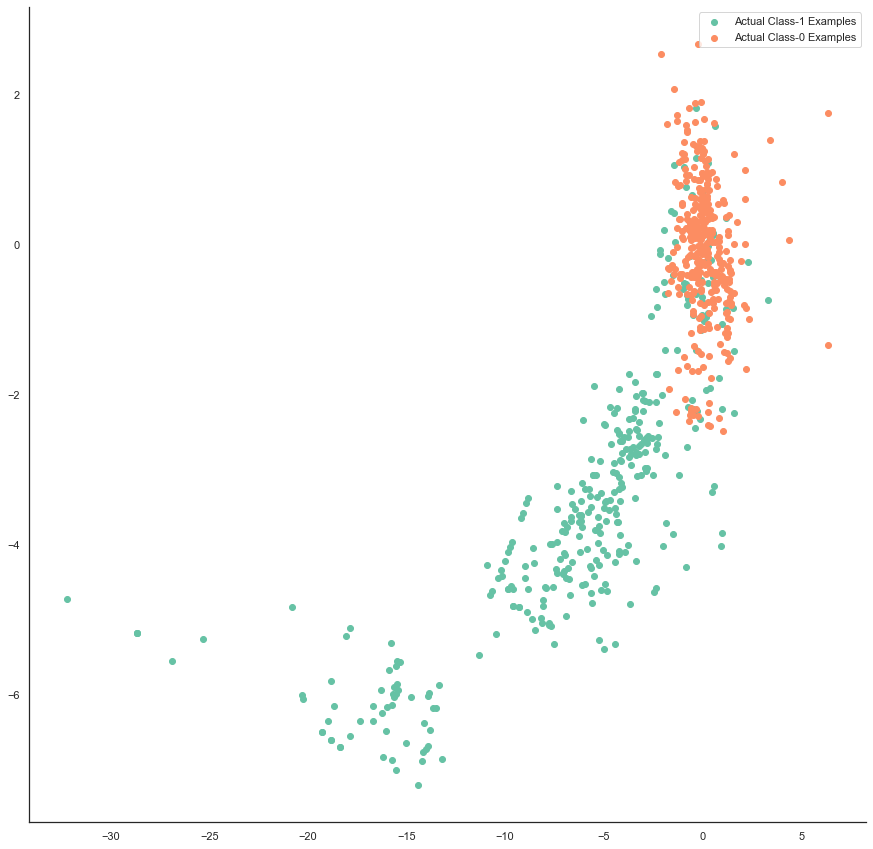

In [78]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 15]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes
We have seen how the models perform with imbalanced dataset. We will now check their performances after applying different class balancing techniques.

We shall perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

### 1. Random Oversampling
We will create a new dataset with RandomOversampler and then train the 3 models on it.

In [79]:
from imblearn import over_sampling
# create oversampler object
ovr_sampler = over_sampling.RandomOverSampler(random_state=42)
#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling
X_train_ovrsampled, y_train_ovrsampled = ovr_sampler.fit_resample(X_train, y_train)

#### A. LogisticRegressionModel

In [80]:
#perform hyperparameter tuning
best_lr_ovrsampled = build_model_and_evaluate(LogisticRegression, {
    'C': [3, 9, 10, 30, 90, 100, 300, 900, 1000, 3000, 9000, 10000],
    'penalty': ['l2'],
    'n_jobs': [4],
    'random_state': [42]
}, X_train_ovrsampled, y_train_ovrsampled)
#print the evaluation result by choosing a evaluation metric
y_pred=  best_lr_ovrsampled.predict(X_test)
y_pred_prob = best_lr_ovrsampled.predict_proba(X_test)
print(f"Test ROC AUC Score is : {metrics(y_test, y_pred, y_pred_prob).iloc[6,1]}")
#print the optimum value of hyperparameters
print("Best Logistic Regression HyperParameters are: ")
print(best_lr_ovrsampled.get_params())

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best training score was : 0.9799984638265787
Test ROC AUC Score is : 0.9761825627715539
Best Logistic Regression HyperParameters are: 
{'C': 30, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': 4, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [81]:
#perform hyperparameter tuning
best_tree_ovrsampled = build_model_and_evaluate(DecisionTreeClassifier,{
    'max_depth': [3, 4, 5, 8],
    'min_samples_split': [5, 10, 20, 25],
    'min_samples_leaf': [3, 5, 7, 9],
    'random_state': [42]
}, X_train_ovrsampled, y_train_ovrsampled)
#print the evaluation result by choosing a evaluation metric
y_pred=  best_tree_ovrsampled.predict(X_test)
y_pred_prob = best_tree_ovrsampled.predict_proba(X_test)
print(f"Test ROC AUC Score is : {metrics(y_test, y_pred, y_pred_prob).iloc[6,1]}")
#print the optimum value of hyperparameters
print("Best Decision Tree HyperParameters are: ")
print(best_tree_ovrsampled.get_params())


Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best training score was : 0.9939742968103094
Test ROC AUC Score is : 0.8976330471466724
Best Decision Tree HyperParameters are: 
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 8, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 7, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


In [82]:
#perform hyperparameter tuning
best_forest_ovrsampled = build_model_and_evaluate(RandomForestClassifier, {
    'max_depth': [3, 5, 8, 10],
    'n_estimators': [3, 7, 10, 20],
    'min_samples_split': [5, 10, 15, 20],
    'min_samples_leaf': [3, 5, 7, 9],
    'random_state': [42]
}, X_train_ovrsampled, y_train_ovrsampled)
#print the evaluation result by choosing a evaluation metric
y_pred=  best_forest_ovrsampled.predict(X_test)
y_pred_prob = best_forest_ovrsampled.predict_proba(X_test)
print(f"Test ROC AUC Score is : {metrics(y_test, y_pred, y_pred_prob).iloc[6,1]}")
#print the optimum value of hyperparameters
print("Best Random Forest HyperParameters are: ")
print(best_forest_ovrsampled.get_params())


Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best training score was : 0.9999360878263465
Test ROC AUC Score is : 0.9694049657327618
Best Random Forest HyperParameters are: 
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 7, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


### Print the class distribution after applying SMOTE 

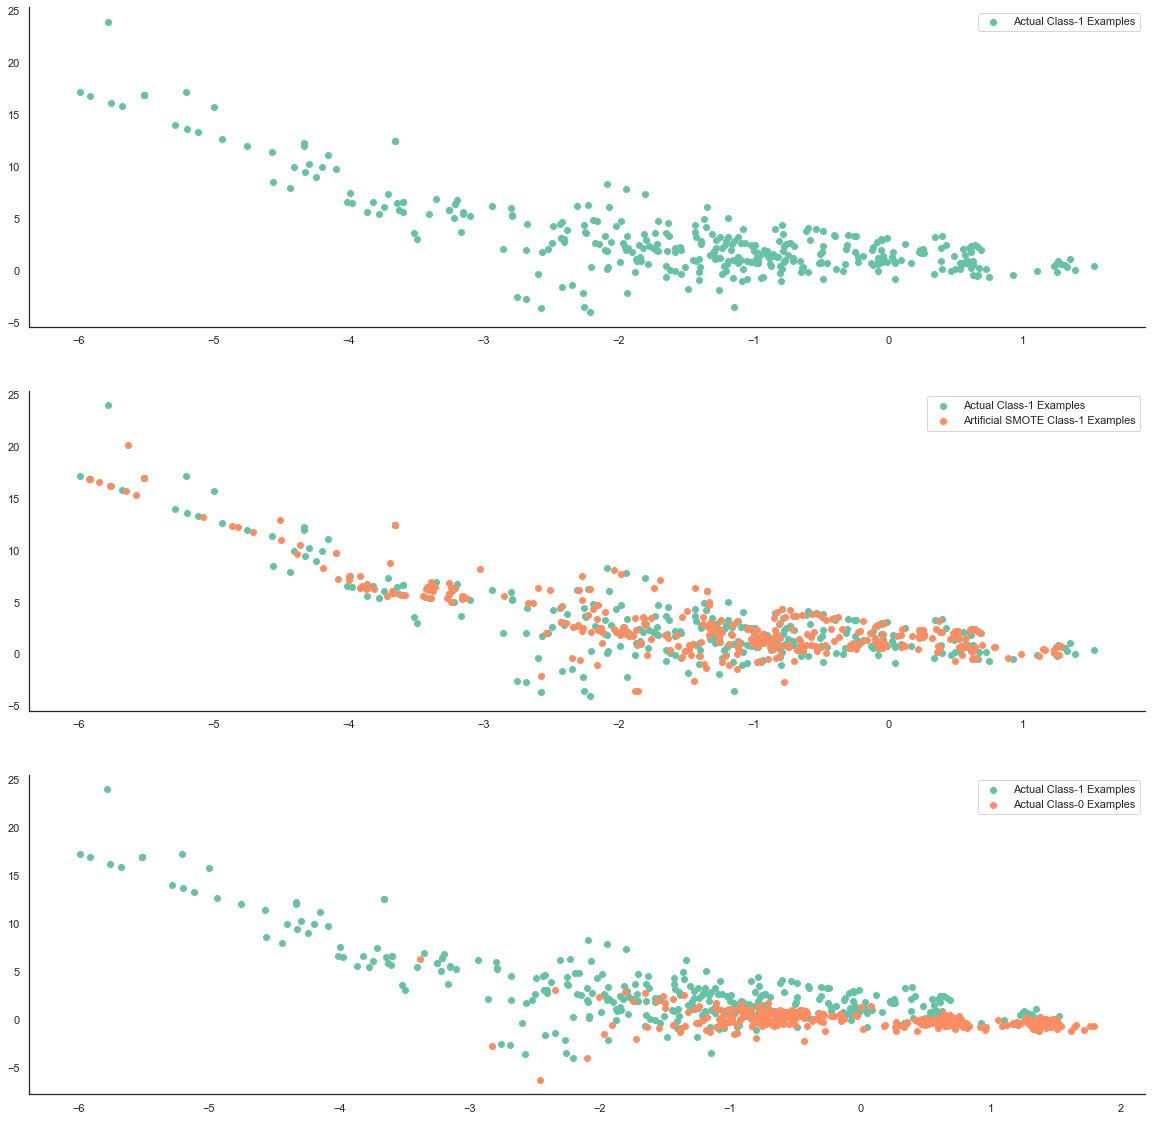

In [83]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [84]:
#perform hyperparameter tuning
best_lr_smote = build_model_and_evaluate(LogisticRegression, {
    'C': [3, 9, 10, 30, 90, 100, 300, 900, 1000, 3000, 9000, 10000],
    'penalty': ['l2'],
    'n_jobs': [4],
    'random_state': [42]
}, X_train_smote, y_train_smote)
#print the evaluation result by choosing a evaluation metric
y_pred=  best_lr_smote.predict(X_test)
y_pred_prob = best_lr_smote.predict_proba(X_test)
print(f"Test ROC AUC Score is : {metrics(y_test, y_pred, y_pred_prob).iloc[6,1]}")
#print the optimum value of hyperparameters
print("Best Logistic Regression HyperParameters are: ")
print(best_lr_smote.get_params())


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best training score was : 0.9842691717834393
Test ROC AUC Score is : 0.9755606739395913
Best Logistic Regression HyperParameters are: 
{'C': 300, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': 4, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [85]:
#perform hyperparameter tuning
best_tree_smote = build_model_and_evaluate(DecisionTreeClassifier,{
    'max_depth': [3, 4, 5, 8],
    'min_samples_split': [5, 10, 20, 25],
    'min_samples_leaf': [3, 5, 7, 9],
    'random_state': [42]
}, X_train_smote, y_train_smote)
#print the evaluation result by choosing a evaluation metric
y_pred=  best_tree_smote.predict(X_test)
y_pred_prob = best_tree_smote.predict_proba(X_test)
print(f"Test ROC AUC Score is : {metrics(y_test, y_pred, y_pred_prob).iloc[6,1]}")
#print the optimum value of hyperparameters
print("Best Decision Tree HyperParameters are: ")
print(best_tree_smote.get_params())


Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best training score was : 0.9937568265994885
Test ROC AUC Score is : 0.9154679827667407
Best Decision Tree HyperParameters are: 
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 8, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 9, 'min_samples_split': 25, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


In [86]:
#perform hyperparameter tuning
best_forest_smote = build_model_and_evaluate(RandomForestClassifier, {
    'max_depth': [5, 8, 10],
    'n_estimators': [7, 10, 20],
    'min_samples_split': [5, 10, 15, 20],
    'min_samples_leaf': [3, 5, 7],
    'random_state': [42]
}, X_train_smote, y_train_smote)
#print the evaluation result by choosing a evaluation metric
y_pred=  best_forest_smote.predict(X_test)
y_pred_prob = best_forest_smote.predict_proba(X_test)
print(f"Test ROC AUC Score is : {metrics(y_test, y_pred, y_pred_prob).iloc[6,1]}")
#print the optimum value of hyperparameters
print("Best Random Forest HyperParameters are: ")
print(best_forest_smote.get_params())


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best training score was : 0.9995166095825061
Test ROC AUC Score is : 0.9781452404774726
Best Random Forest HyperParameters are: 
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 5, 'min_samples_split': 15, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


##### Build models on other algorithms to see the better performing on SMOTE

### Print the class distribution after applying ADASYN

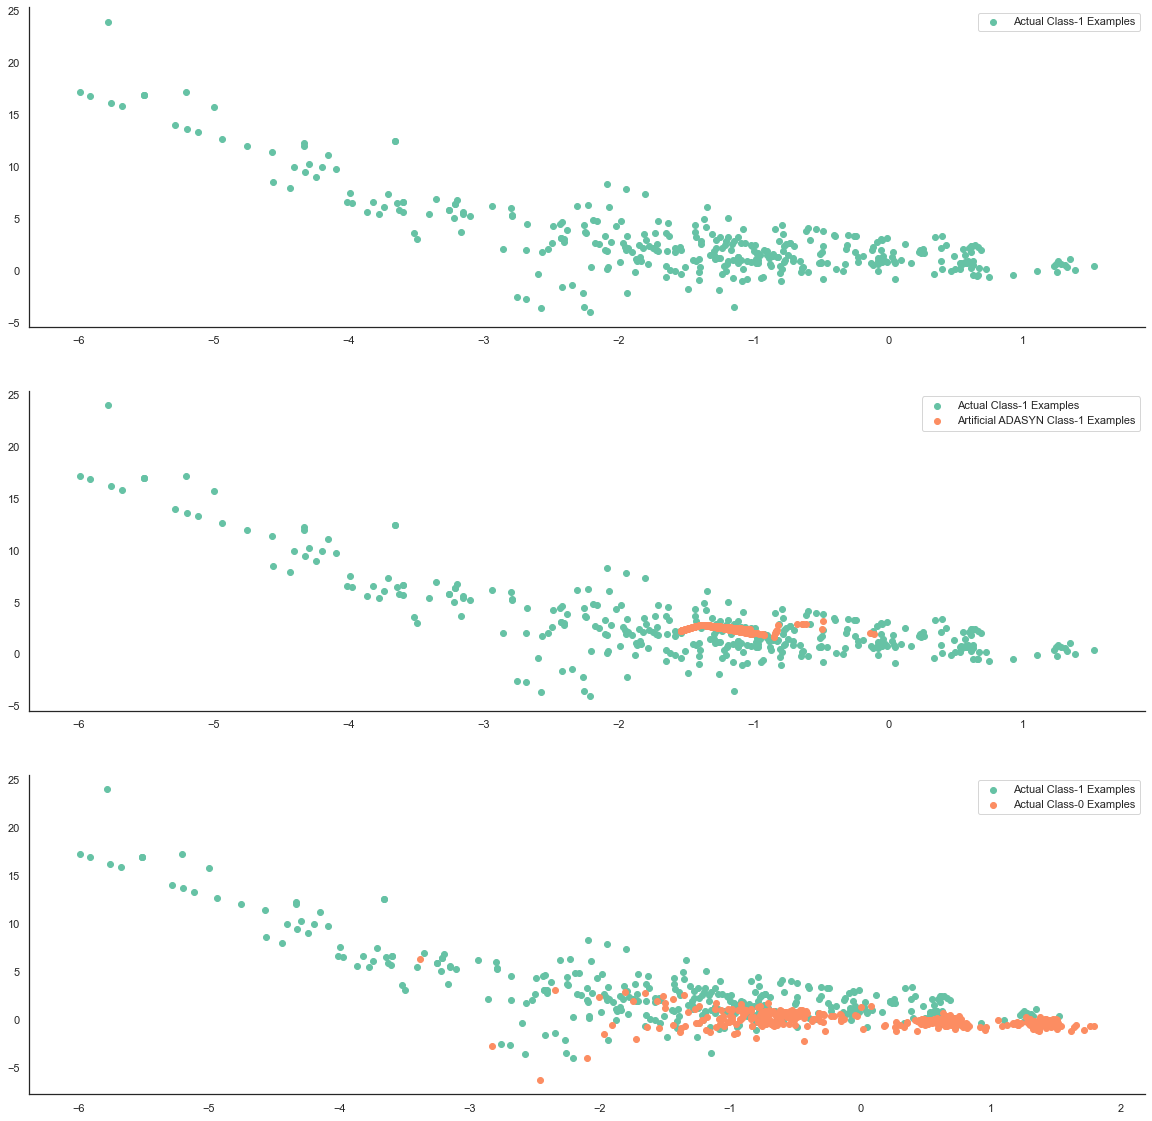

In [87]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [88]:
#perform hyperparameter tuning
best_lr_adasyn = build_model_and_evaluate(LogisticRegression, {
    'C': [3, 9, 10, 30, 90, 100, 300, 900, 1000, 3000, 9000, 10000],
    'penalty': ['l2'],
    'n_jobs': [4],
    'random_state': [42]
}, X_train_adasyn, y_train_adasyn)
#print the evaluation result by choosing a evaluation metric
y_pred=  best_lr_adasyn.predict(X_test)
y_pred_prob = best_lr_adasyn.predict_proba(X_test)
print(f"Test ROC AUC Score is : {metrics(y_test, y_pred, y_pred_prob).iloc[6,1]}")
#print the optimum value of hyperparameters
print("Best Logistic Regression HyperParameters are: ")
print(best_lr_adasyn.get_params())


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best training score was : 0.944791534768538
Test ROC AUC Score is : 0.9747913935757289
Best Logistic Regression HyperParameters are: 
{'C': 3, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': 4, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [89]:
#perform hyperparameter tuning
best_tree_adasyn = build_model_and_evaluate(DecisionTreeClassifier,{
    'max_depth': [3, 4, 5, 8],
    'min_samples_split': [5, 10, 20, 25],
    'min_samples_leaf': [3, 5, 7, 9],
    'random_state': [42]
}, X_train_adasyn, y_train_adasyn)
#print the evaluation result by choosing a evaluation metric
y_pred=  best_tree_adasyn.predict(X_test)
y_pred_prob = best_tree_adasyn.predict_proba(X_test)
print(f"Test ROC AUC Score is : {metrics(y_test, y_pred, y_pred_prob).iloc[6,1]}")
#print the optimum value of hyperparameters
print("Best Decision Tree HyperParameters are: ")
print(best_tree_adasyn.get_params())

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best training score was : 0.9314604393542704
Test ROC AUC Score is : 0.9507992413559607
Best Decision Tree HyperParameters are: 
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 8, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 9, 'min_samples_split': 20, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


In [90]:
#perform hyperparameter tuning
best_forest_adasyn = build_model_and_evaluate(RandomForestClassifier, {
    'max_depth': [5, 8, 10],
    'n_estimators': [7, 10, 20],
    'min_samples_split': [5, 10, 15, 20],
    'min_samples_leaf': [3, 5, 7],
    'random_state': [42]
}, X_train_adasyn, y_train_adasyn)
#print the evaluation result by choosing a evaluation metric
y_pred=  best_forest_adasyn.predict(X_test)
y_pred_prob = best_forest_adasyn.predict_proba(X_test)
print(f"Test ROC AUC Score is : {metrics(y_test, y_pred, y_pred_prob).iloc[6,1]}")
#print the optimum value of hyperparameters
print("Best Random Forest HyperParameters are: ")
print(best_forest_adasyn.get_params())


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best training score was : 0.9868563045855471
Test ROC AUC Score is : 0.9845612541967799
Best Random Forest HyperParameters are: 
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 3, 'min_samples_split': 15, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


**Observations**

The synthetic samples generated by ADASYN are not dispersed as the natural ones. Rather, they are concentrated in a definite area. 

This gets reflected in the scores of the models also. The DecisionTreeClassifier is underfitting the training data but performing better in test set which would be circumstantial.
The LogisticRegressionClassifier is also having similar issue.

On the contrary, with SMOTE oversampling, the LogisticRegressionClassfier, DecisionTreeClassfier and RandomForestClassfier all 3 were overfitting, some more some less but their results were still comparable and reliable.

We shall finalize the LR algorithm with SMOTE oversampling since it gave 98.4 training score and 97.5 test ROC AUC Score. Although the RandomForest performed better with 99% score, the overfitting is less in LR and hence we would finalize it.

In [102]:
# clf = best_lr_smote

# var_imp = []
# for i in clf.feature_importances_:
#     var_imp.append(i)
# print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
# print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
# print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)


# top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
# second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

# X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
# X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

# np.random.shuffle(X_train_0)

# import matplotlib.pyplot as plt
# %matplotlib inline
# plt.rcParams['figure.figsize'] = [15, 15]

# plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
# plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
#             label='Actual Class-0 Examples')
# plt.legend();

#### Print the FPR,TPR & select the best threshold from the roc curve

In [94]:
from sklearn.metrics import roc_curve

y_pred=  best_lr_smote.predict(X_test)
y_pred_prob = best_lr_smote.predict_proba(X_test)

print('Train auc =',roc_auc_score(y_true=y_test, y_score=y_pred_prob[:,1]))
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred_prob[:,1])
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 0.9755606739395913
0.7075954378557214


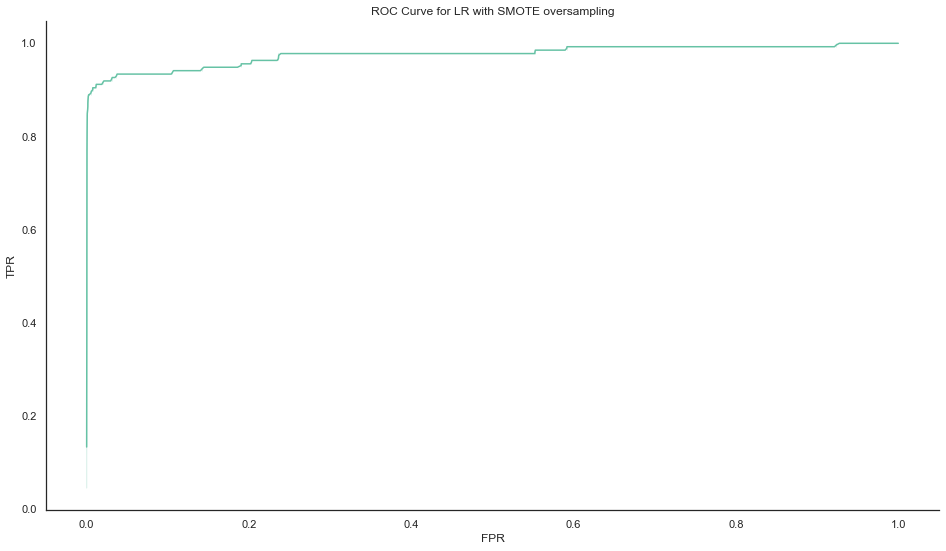

In [100]:
# Draw ROC Curve
plt.figure(figsize=(16,9))
ax = sns.lineplot(fpr, tpr);
ax.set(title='ROC Curve for LR with SMOTE oversampling', xlabel='FPR',ylabel='TPR');

